## Regression_HW14

## 1.Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
bottle_df=pd.read_csv('../SupervisedML_13/bottle.csv',low_memory=False)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
bottle_df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

### Cleaning Nans

In [77]:
#dropping the columns which have more than 70% of Nans.
bottle_clean_df=bottle_df.drop(['TA1','TA2','pH2','pH1','DIC Quality Comment','R_PHAEO','R_SAMP','DIC1','DIC2','R_NH4','R_CHLA','MeanAs','MeanAp','IncTim','LightP','C14A2p','DarkAs','DarkAp','BtlNum','T_qual','S_qual','O_qual','SThtaq','O2Satq','ChlorA','NH3uM','C14As1','C14A1p','C14As2'],axis=1)
bottle_clean_df.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaeop         639592
Phaqua         225693
PO4uM          451546
PO4q           413077
SiO3uM         510772
SiO3qu         353997
NO2uM          527287
NO2q           335389
NO3uM          527460
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_SIO3         510764
R_PO4          451538
R_NO3          527452
R_NO2          527279
R_PRES              0
dtype: int

In [78]:
bottle_num_df=bottle_clean_df.select_dtypes(include=[np.number])
bottle_num_df

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
0,1,1,0,10.500,33.4400,NaN,25.64900,NaN,NaN,3,...,25.640,233.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,2,8,10.460,33.4400,NaN,25.65600,NaN,NaN,3,...,25.650,232.5,0.010,NaN,NaN,NaN,NaN,NaN,NaN,8
2,1,3,10,10.460,33.4370,NaN,25.65400,NaN,NaN,7,...,25.650,232.8,0.020,NaN,NaN,NaN,NaN,NaN,NaN,10
3,1,4,19,10.450,33.4200,NaN,25.64300,NaN,NaN,3,...,25.640,234.1,0.040,NaN,NaN,NaN,NaN,NaN,NaN,19
4,1,5,20,10.450,33.4210,NaN,25.64300,NaN,NaN,7,...,25.640,234.0,0.040,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,5.805,23.87055,108.74,253.47,7,...,23.871,402.4,0.000,5.81,108.7,1.8,0.22,0.1,0.03,0
864859,34404,864860,2,18.744,33.4083,5.805,23.87072,108.74,253.47,3,...,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,2
864860,34404,864861,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3,...,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,5
864861,34404,864862,10,18.161,33.4062,5.816,24.01426,107.74,253.92,3,...,24.014,389.1,0.040,5.82,107.7,2.0,0.25,0.1,0.03,10


### Filling the dataset with the mean value of the attribute

* Replacing Nans with their mean using SimpleImputer from scikit package.

In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df=imputer.fit_transform(bottle_num_df)
df

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.73021884e+01, 4.23363667e-02, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 8.00000000e+00, ...,
        1.73021884e+01, 4.23363667e-02, 8.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 1.00000000e+01, ...,
        1.73021884e+01, 4.23363667e-02, 1.00000000e+01],
       ...,
       [3.44040000e+04, 8.64861000e+05, 5.00000000e+00, ...,
        1.00000000e-01, 3.00000000e-02, 5.00000000e+00],
       [3.44040000e+04, 8.64862000e+05, 1.00000000e+01, ...,
        1.00000000e-01, 3.00000000e-02, 1.00000000e+01],
       [3.44040000e+04, 8.64863000e+05, 1.50000000e+01, ...,
        1.00000000e-01, 5.00000000e-02, 1.50000000e+01]])

### Feature Scaling

* Converting our dataset to look normally distributed using StandardScaler from scikit module. (zero mean and unit variance)

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
nonan_bottle_df=pd.DataFrame(sc.fit_transform(df),columns=bottle_num_df.columns)
nonan_bottle_df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
0,-1.673458,-1.732049,-0.717709,-0.071067,-0.891606,-4.774785e-16,-0.150570,4.381252e-16,-3.604034e-16,-0.905640,...,-0.156928,0.133144,-1.161028,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-0.714951
1,-1.673458,-1.732045,-0.692396,-0.080552,-0.891606,-4.774785e-16,-0.144385,4.381252e-16,-3.604034e-16,-0.905640,...,-0.147752,0.127624,-1.134138,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-0.689908
2,-1.673458,-1.732041,-0.686068,-0.080552,-0.898287,-4.774785e-16,-0.146152,4.381252e-16,-3.604034e-16,1.224936,...,-0.147752,0.130936,-1.107247,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-0.683648
3,-1.673458,-1.732037,-0.657592,-0.082924,-0.936148,-4.774785e-16,-0.155872,4.381252e-16,-3.604034e-16,-0.905640,...,-0.156928,0.145287,-1.053467,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-0.655475
4,-1.673458,-1.732033,-0.654428,-0.082924,-0.933920,-4.774785e-16,-0.155872,4.381252e-16,-3.604034e-16,1.224936,...,-0.156928,0.144183,-1.053467,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-0.652344


### Preprocessing on cast file

In [52]:
cast_df=pd.read_csv('../SupervisedML_13/cast.csv',low_memory=False)
cast_df

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


### Cleaning Nulls

In [177]:
cast_df.isnull().sum()

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64

In [58]:
#removing the columns which have more than 80% of Nans
cast_clead_df=cast_df.drop(['IntC14','Inc_Str','Inc_End','PST_LAN','Civil_T','TimeZone','Visibility','Cloud_Typ','Secchi','Cruz_Leg','ForelU'],axis=1)

In [59]:
cast_clead_df.isnull().sum()

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Ship_Name       1690
Ship_Code          0
Data_Type          0
Order_Occ      24450
Event_Num          3
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
IntChl         22201
Wave_Dir       21846
Wave_Ht        22306
Wave_Prd       22770
Wind_Dir        1476
Wind_Spd        1679
Barometer      15341
Dry_T          15333
Wet_T        

In [61]:
cast_num_df=cast_clead_df.select_dtypes(include=[np.number])

### Filling the dataset with the mean value of the attribute

In [64]:
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean')
cast=imputer1.fit_transform(cast_num_df)

### Feature Scaling

In [310]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
no_null_cast_df=pd.DataFrame(sc1.fit_transform(cast),columns=cast_num_df.columns)
no_null_cast_df.head()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Amt
0,-1.732000,-1.267657,-1.267680,-1.771799,-1.251565,0.0,-1.266164,-0.852308,-1.312992,-1.006019,...,7.170006e-16,0.0,6.654208e-16,-0.439684,1.031447,-5.195668e-14,0.0,9.090805e-16,0.658014,4.865947e-16
1,-1.731900,-1.267657,-1.267681,-1.861886,-1.251565,0.0,-1.266164,-0.852308,-1.312992,-1.006019,...,7.170006e-16,0.0,6.654208e-16,-1.196343,-0.922037,-5.195668e-14,0.0,9.090805e-16,2.606902,4.865947e-16
2,-1.731799,-1.267657,-1.267681,-1.906928,-1.251565,0.0,-1.266164,-0.852308,-1.312847,-0.996095,...,7.170006e-16,0.0,6.654208e-16,-0.439684,-0.922037,-5.195668e-14,0.0,9.090805e-16,4.555790,4.865947e-16
3,-1.731698,-1.267657,-1.267682,-1.951969,-1.251565,0.0,-1.266164,-0.852308,-1.312847,-0.996095,...,7.170006e-16,0.0,6.654208e-16,-0.980155,-0.471233,-5.195668e-14,0.0,9.090805e-16,0.658014,4.865947e-16
4,-1.731598,-1.267657,-1.267682,-1.951929,-1.251565,0.0,-1.266164,-0.852308,-1.312847,-0.996095,...,7.170006e-16,0.0,6.654208e-16,-0.007307,0.280107,-5.195668e-14,0.0,9.090805e-16,5.530234,4.865947e-16


## 2. Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

* Extracting valuable features of dataset is essential part of data preparation to train model in machine learning. Because if we give qualified inputs, our model will give back qualified outputs. Other wise remember the famous saying, **Garbage in Garbage Out**

* Since I am going to predict the water temperature, my prediction column is T_degC.


* Some of our columns in bottle dataset has bottle number(BtlNum), cast number, bottle count(Btl_Cnt),cast count(Cst_Cnt),station id(Sta_ID),quality codes. Those id columns won't give much details about the changes and correlation with water temperature.


* When I subsetted temperature and reported temperatute columns, I saw that both are same values. I repeated the subset check with the main columns and R_columns, It was all almost same values. So I decided not to take R_columns.


In [81]:
ex=nonan_bottle_df[['T_degC','R_TEMP']]
ex

,T_degC,R_TEMP
0,-0.071067,-0.071072
1,-0.080552,-0.080557
2,-0.080552,-0.080557
3,-0.082924,-0.082929
4,-0.082924,-0.082929
...,...,...
864858,1.883952,1.882997
864859,1.883952,1.882997
864860,1.871621,1.871140
864861,1.745697,1.745453


In [82]:
e=nonan_bottle_df[['R_SALINITY','Salnty']]
e

,R_SALINITY,Salnty
0,-0.889300,-0.891606
1,-0.889300,-0.891606
2,-0.895965,-0.898287
3,-0.933732,-0.936148
4,-0.931511,-0.933920
...,...,...
864858,-0.960392,-0.962204
864859,-0.960392,-0.962204
864860,-0.944840,-0.947283
864861,-0.964835,-0.966881


In [85]:
corr_col=nonan_bottle_df.drop(['R_Depth','R_TEMP','R_POTEMP','R_SALINITY','R_SIGMA','R_SVA','R_DYNHT','R_O2','R_O2Sat','R_SIO3','R_PO4','R_NO3','R_NO2','R_PRES'],axis=1)


<AxesSubplot:>

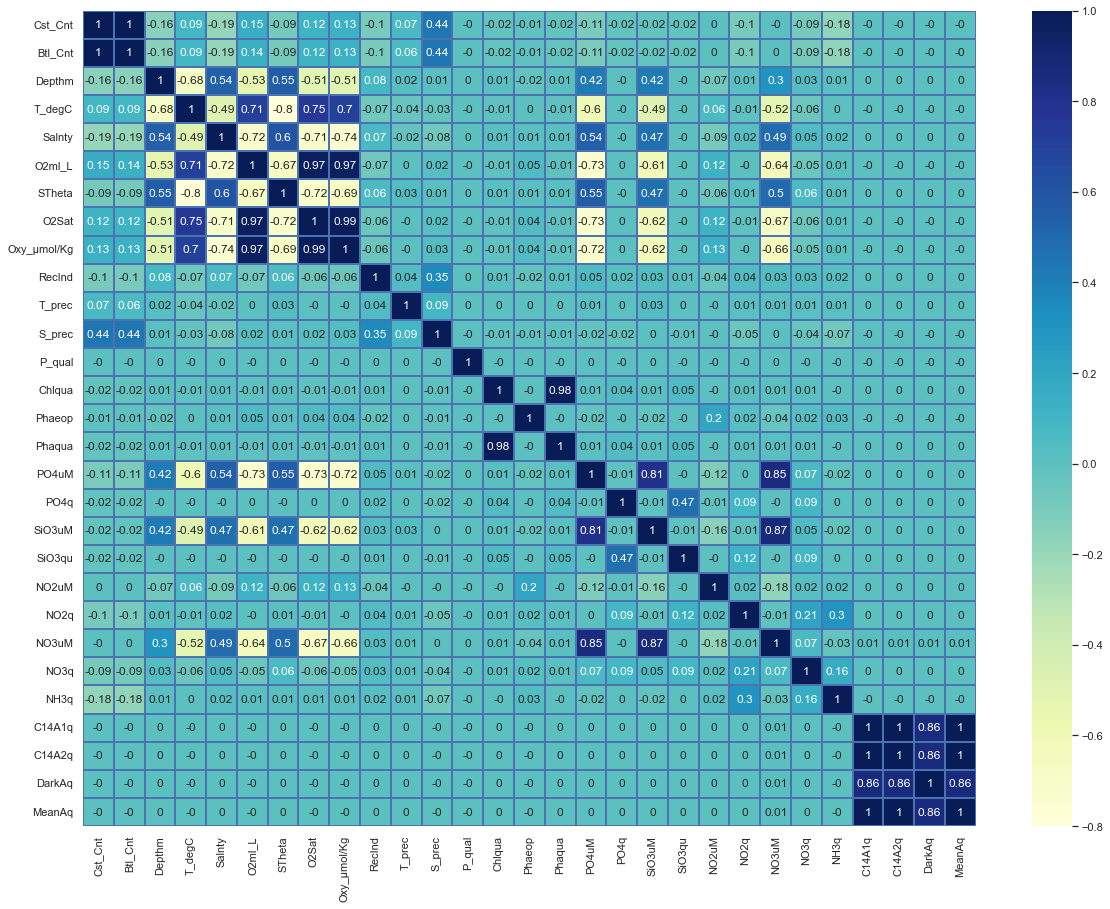

In [86]:
#visualizing correlation between columns using heatmap
correlation=corr_col.corr().round(2)
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(correlation,annot=True,cmap="YlGnBu",linewidth=1.5,linecolor='b')

In [123]:
# analysing correlation between water temperature and other columns
correlation['T_degC']

Cst_Cnt        0.088783
Btl_Cnt        0.089581
Depthm        -0.678628
T_degC         1.000000
Salnty        -0.489967
O2ml_L         0.712731
STheta        -0.804295
O2Sat          0.745131
Oxy_µmol/Kg    0.696899
RecInd        -0.066060
T_prec        -0.041076
S_prec        -0.034964
P_qual        -0.000570
Chlqua        -0.005700
Phaeop         0.002417
Phaqua        -0.005920
PO4uM         -0.602995
PO4q          -0.000314
SiO3uM        -0.493519
SiO3qu        -0.000218
NO2uM          0.055422
NO2q          -0.013233
NO3uM         -0.522177
NO3q          -0.056844
NH3q           0.000991
C14A1q        -0.004126
C14A2q        -0.004126
DarkAq        -0.004003
MeanAq        -0.004149
Name: T_degC, dtype: float64

In [131]:
#Selecting highly correlated columns
output_var=abs(correlation['T_degC'])
relevant_columns = output_var[output_var>0.5]
relevant_columns

Depthm         0.68
T_degC         1.00
O2ml_L         0.71
STheta         0.80
O2Sat          0.75
Oxy_µmol/Kg    0.70
PO4uM          0.60
NO3uM          0.52
Name: T_degC, dtype: float64

#### Observation from correlation:

* From the correlation values, we can say that Water Temperature is highly correlated with **STheta** (Density of Water), **O2Sat** (Oxygen Saturation),**O2ml_L** (dissolved oxygen per Liter seawater),**Oxy_µmol/Kg** (Oxygen in micro moles per kilogram of seawater), **Depthm** (Depth of water in meters) and moderately correlated with **PO4uM** (Phosphate concentration),**NO3uM** (Nitrate concentration).


* Columns Oxy_µmol/Kg and O2ml_L are similar values with different units. Because 1 ml/l of O2 is approximately 43.570 µmol/kg. So I am taking one column(**O2ml_L**) from these two. 


* By using RFE method from scikit learn package, we can find which will be the best columns for input.

### Recursive Feature Selection

* Scikit-learn API provides RFE class that ranks features by recursive feature elimination to select best features. The method recursively eliminates the least important features based on specific attributes taken by estimator.

#### Why Estimator?

* We need an estimator for RFE class. For example, a linear model or a decision tree model. These models have coefficients for linear models and feature importances in decision tree models. In selecting the optimal number of features, the estimator is trained and the features are selected via the coefficients, or via the feature importances. The least important features are removed. This process is repeated recursively until the optimal number of features is obtained.

##### Finding number of input features
* Now we have to find the optimum number of features to select.

* We do that by using loop starting with one feature and going upto 6 features. Will take the number where we got maximum score.

In [88]:
# columns we found from correlation
relative_columns=nonan_bottle_df[['Depthm','T_degC','STheta','O2Sat','PO4uM','NO3uM','O2ml_L']]
relative_columns_df=pd.DataFrame(relative_columns)

X=relative_columns_df.drop('T_degC',axis=1)
y=relative_columns_df['T_degC']

score={}
for n in range(1,7):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
    e=LinearRegression()
    rf=RFE(e,n_features_to_select=n)
    rf.fit(X_train,y_train)
    score.update({n:rf.score(X_test,y_test)})
for k,v in score.items():
    if v==max(score.values()):
        print("Score with %d features: %f" % (k,v))

Score with 6 features: 0.779656


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from numpy import array

* From RFE method we found that for 6 input features we get maximum score. So Now we can use all our features as an input.

In [207]:
X=relative_columns_df.drop('T_degC',axis=1)
y=relative_columns_df['T_degC']

# data splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

# we need an estimator to RFE class.
estimator=LinearRegression()

# since we got our estimator now we can define our selector
selector=RFE(estimator,n_features_to_select=6)

#fitting selctor into dataset
selector.fit(X,y)

#after fitting, we can obtain our selected features and its rank
selector.support_
print('Ranking :',selector.ranking_)

#to make it readable, printing the feature names

features =array(relative_columns_df.columns.drop('T_degC'))
print("All features: ")
print(features)
print("Selected features: ")
print(features[selector.support_])
  

[ True  True  True  True  True  True]
Ranking : [1 1 1 1 1 1]
All features: 
['Depthm' 'STheta' 'O2Sat' 'PO4uM' 'NO3uM' 'O2ml_L']
Selected features: 
['Depthm' 'STheta' 'O2Sat' 'PO4uM' 'NO3uM' 'O2ml_L']


### Summary about how I selected features:

* In preprocessing I dropped some columns which is having more than 70% nans. 


* From the correlation matrix, I took the columns which is correlated more than 50% with our predicted column(T_degC).That was 7 columnns.(Depthm, STheta, O2Sat, PO4uM, NO3uM, Oxy_µmol/Kg, O2ml_L).Columns Oxy_µmol/Kg and O2ml_L are similar values with different units. Because 1 ml/l of O2 is approximately 43.570 µmol/kg. So I am taking one column(O2ml_L) from these two.


* We found that we got maximum score with 6 features using loop starting with 1 feature going upto 6 features. So our optimum number of features are 6. 


**Selected features from feature selection method**

* Using RFE method, We got our top 6 input features.The features are Depthm, STheta, O2Sat, PO4uM, NO3uM,O2ml_L.

## 3.Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 


* since we have 6 input features, our equation will be  

**T_degC= (m1xDepthm)+ (m2xSTheta)+ (m3xO2Sat) + (m4xPO4uM) + (m5xNO3uM) + (m6xO2ml_L)**

Now we are going to calculate our coefficients

In [209]:
relative_columns_df

,Depthm,T_degC,STheta,O2Sat,PO4uM,NO3uM,O2ml_L
0,-0.717709,-0.071067,-0.150570,4.381252e-16,3.100467e-16,0.000000,-4.774785e-16
1,-0.692396,-0.080552,-0.144385,4.381252e-16,3.100467e-16,0.000000,-4.774785e-16
2,-0.686068,-0.080552,-0.146152,4.381252e-16,3.100467e-16,0.000000,-4.774785e-16
3,-0.657592,-0.082924,-0.155872,4.381252e-16,3.100467e-16,0.000000,-4.774785e-16
4,-0.654428,-0.082924,-0.155872,4.381252e-16,3.100467e-16,0.000000,-4.774785e-16
...,...,...,...,...,...,...,...
864858,-0.717709,1.883952,-1.722117,1.591961e+00,-1.877705e+00,-1.888727,1.296960e+00
864859,-0.711381,1.883952,-1.721967,1.591961e+00,-1.877705e+00,-1.888727,1.296960e+00
864860,-0.701889,1.871621,-1.705717,1.583329e+00,-1.905632e+00,-1.889825,1.292122e+00
864861,-0.686068,1.745697,-1.595126,1.561131e+00,-1.835815e+00,-1.887629,1.302874e+00


In [90]:
X=relative_columns_df[['Depthm','STheta','O2Sat', 'PO4uM','NO3uM','O2ml_L']]
y=relative_columns_df['T_degC']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=55)
#defining multiple linear regression model
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Accuracy Score: ", reg.score(X_test,y_test).round(2)*100,'%')
y_pred=reg.predict(X_test)
print("Coefficients are: ", reg.coef_.round(2))
print("Intercept is: ",reg.intercept_.round(4))

Accuracy Score:  60.0 %
Coefficients are:  [-0.26 -0.58  0.22 -0.09  0.02 -0.09]
Intercept is:  -0.0002


#### Result  Explained:

The reg.coef_ gave all of our input variable coefficients and we got our intercept value from reg.intercept. For example,

**The coefficient of depthm tells us if water depth increases by 1 meter then water temperature decreases by 0.26**

**The coefficient of o2sat tells us if oxygen saturation increases by 1 percent then water temperature increases by 0.22**

* Equation will be

**T_degC= -0.0002 + (-0.26xDepthm) + (-0.58xSTheta) + (0.22xO2Sat) + (-0.09xPO4uM) + (0.02xNO3uM) + (-0.09xO2ml_L)**

* I have calculated temperature for just the last row from our relative_columns_df to check how my coefficients predicting water temperature.

T_degC = -0.0002 + (-0.26 * -0.67) + (-0.58 * -1.47) + (0.22 * 1.49) +(-1.75 * -0.09) + (-1.88 * 0.02) +(1.28 * -0.09)=1.36

* From our model we got predicted temperature is 1.36 but the actual temperature is 1.60. 

#### Metrics to see the performance of model

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [94]:
print("R2 score for multilinear regression: ",r2_score(y_test,y_pred).round(2))
print("MSE for multilinear regression: ",mean_squared_error(y_test,y_pred).round(2))
print("MAE for multilinear regression: ",mean_absolute_error(y_test,y_pred).round(2))

R2 score for multilinear regression:  0.6
MSE for multilinear regression:  0.39
MAE for multilinear regression:  0.28


#### Another approach
#### OLS Multiple linear Regression model

In [93]:
from statsmodels.formula.api import ols
reg_fit=ols("T_degC ~ Depthm + STheta + O2Sat + PO4uM + NO3uM + O2ml_L",data=relative_columns_df).fit()
reg_fit.params.round(3)

Intercept    0.000
Depthm      -0.298
STheta      -0.431
O2Sat        0.377
PO4uM       -0.101
NO3uM        0.016
O2ml_L      -0.165
dtype: float64

#### Equation from ols method
T_degC= 1.448836e-14 + (-0.26xDepthm) + (-0.58xSTheta) + (0.22xO2Sat) + (-0.09xPO4uM) + (0.02xNO3uM) + (-0.09xO2ml_L)

## 4.Which regression approach had the “best” performance? Be sure to compare it to what you did last week.


I took few parameters to check the performance of our models.

   * R2: It explains how close our predicted values and actual values. If we have r2 closer to 1 then our predicted values are almost equal to actual value and our model is good.
    
   * MSE: Average squared difference between predicted values and actual values.  it is strictly positive and values closer to zero are better.
    
   * RMSE: If the predicted responses are very close to the true responses the RMSE will be small. If the predicted and true responses differ substantially — at least for some observations — the RMSE will be large.A value of zero would indicate a perfect fit to the data.
       
   * MAE:It tell us how accurate our predictions are and, what is the amount of deviation from the actual values.

* Usually in scikit library metrices with _ score values, **the higher the better**

* metrics with _ error values, **the lower the better**


|      Metrices              |   Linear Regression         |    Polynomial Regression       | Multi Linear Regression     |
|:--------------------------:|:---------------------------:|:------------------------------:|:---------------------------:|
|   R2 Score                 |      0.42                   |          0.59                  |         0.6                 |
| MSE(Mean Square Error)     |      9.26                   |          6.57                  |         0.37                |
| MAE(Mean Absolute Error)   |      2.34                   |          1.97                  |         0.28                |
|RMSE(Root Mean Square Error)|      3.04                   |          2.57                  |         0.61                |

* From the comparison table, Polynomial and multi linear regression have almost same accuracy score. But Error parameters are very less in Multi linear than polynomial. As I said earlier, the lower the error model is best. From the analysis between these 3 methods, Linear Regression has worst performance and **Multi linear regression has best performance**

## 5.Work with the diabetes dataset to perform multiple logistic regression. 


In [2]:
diabetes_df=pd.read_csv("../SupervisedML_13/diabetes.csv",low_memory=False)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
#lets make sure our dataset doesn't have nulls
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

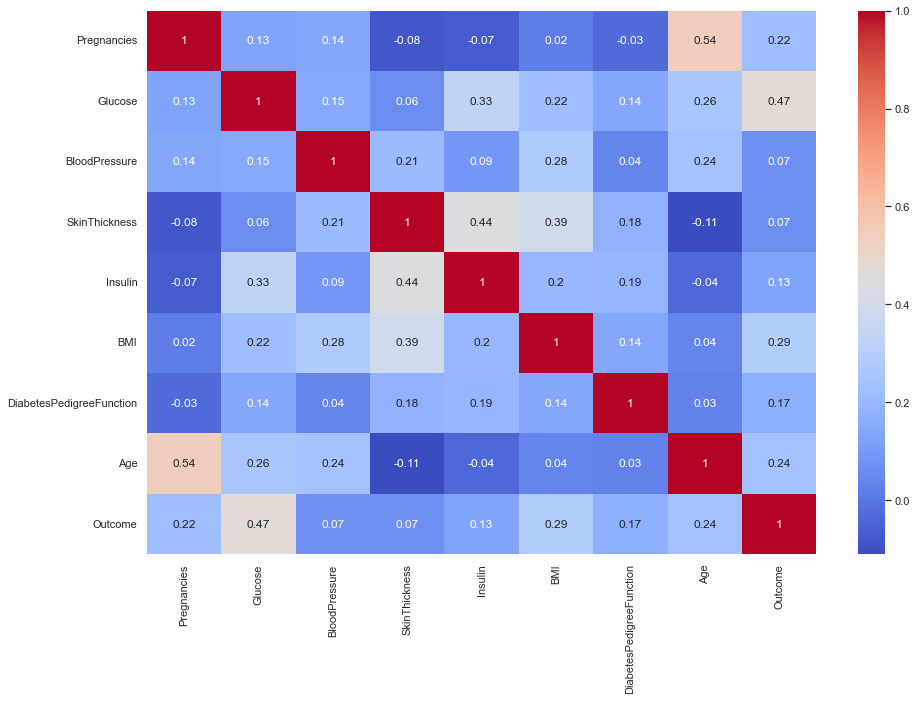

In [12]:
#lets take correlation of every feature and visualize the correlation using heatmap
corr= diabetes_df.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr.round(2),annot=True,cmap='coolwarm');

In [34]:
corr['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

 * From the correlation matrix we can say that outcome is highly correlated with Glucose than other variables. Even though correlation value is not higher but that was the highest we got it. And second highest correlated variable is BMI.

* So we can take those two features as input. We can use Recursive Feature Selection(RFE) method also to select best  features.  

### Feature Selection
### Finding Number of feature to use as an input 

In [49]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
score={}
for n in range(1,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)
    sc= StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.fit_transform(X_test)
    rfe=RFE(LogisticRegression(),n_features_to_select=n)
    rfe.fit(X_train,y_train)
    score.update({n: rfe.score(X_test,y_test)})
for k,v in score.items():
    if v==max(score.values()):
        print("Score with %d features: %f" %(k,v))

Score with 2 features: 0.744589
Score with 8 features: 0.744589


**We achieved maximum score with 2 and 8 features. Since we achieved same high score, better we chose 2 features. Now we have to find the best 2 features using RFE method.**

### Choosing top 2 rank features using RFE method

In [50]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=11)
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
rfe=RFE(LogisticRegression(),n_features_to_select=2)
rfe.fit(X_train,y_train)
print(rfe.support_)
print('Ranking :',rfe.ranking_)

#to make it readable, printing the feature names
from numpy import array

features =array(diabetes_df.columns.drop('Outcome'))
print("All features: ")
print(features)
print("Selected features: ")
print(features[rfe.support_])
  

[False  True False False False  True False False]
Ranking : [2 1 3 7 6 1 4 5]
All features: 
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
Selected features: 
['Glucose' 'BMI']


**we got our 2 best features from RFE method** which are Glucose, BMI. Now we can do our logistic regression.

### Multiple Logistic Regression using Scikit Library

In [122]:
X = diabetes_df[['Glucose','BMI']]
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Simplest logistic regression approach
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression().fit(X_train, y_train)
regression_score=regression.score(X_test, y_test).round(2)
y_predicted = regression.predict(X_test)
print("Accuracy Score from scikit logistic Regression method: ",regression_score*100,'%' )
print("Coefficients are: ",regression.coef_.round(2))
print("Intercept is: ",regression.intercept_.round(2))

Accuracy Score from scikit logistic Regression method:  74.0 %
Coefficients are:  [[1.2  0.69]]
Intercept is:  [-0.83]


#### Equation
Intercept is:  -0.83

**Outcome = (1.2* Glucose)  +  (0.69* BMI)**

#### Another approach:
### Multiple Logistic Regression using statsmodels

In [106]:
from statsmodels.formula.api import logit
diabetes_ols=logit("Outcome ~ Glucose + BMI",data=diabetes_df).fit()
diabetes_ols.params.round(2)

Optimization terminated successfully.
         Current function value: 0.502215
         Iterations 6


Intercept   -7.52
Glucose      0.04
BMI          0.08
dtype: float64

#### Equation will be
Intercept is: -7.52

Outcome = (0.04* Glucose) + (0.08* BMI)

## 6.What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

* Besides accuracy, there are many metrics to analyze the performance of our model.
    * r2_score
    * Confusion matrix
    * Precision
    * Recall
    * MSE
    * RMSE
    * MAE
    
* From these many performance metrics, I am taking **r2_score, MSE** metrics to see the performance of diabetes dataset.
 
* Because r2 score explains how close our predicted values and actual values. Higher r2 score is good fit. And MSE tells average squared difference between predicted values and actual values. it is strictly positive and values closer to zero are better.     

#### MSE and R squared for Multiple logistic regression

In [123]:
print("R squared from multiple logostic Regression: ",r2_score(y_test,y_predicted).round(2))
print("MSE from multiple logostic Regression: ",mean_squared_error(y_test,y_predicted).round(2))

R squared from multiple logostic Regression:  -0.13
MSE from multiple logostic Regression:  0.26


## 7. Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

* Some important tuning parameters in logistic regression is:

    * C: inverse of regularization strength
    * penalty: type of regularization
    * solver: algorithm used for optimization

* For diabetes set, I would like to tune my C parameter to check whether r squared and MSE has any impact or not.

* C is a floating point number. Default it is 1.0. A large C can lead to an overfit model, while a small C can lead to an underfit model.

* We can use GridSearchCV and logistic regression to find optimal C value from C space. We usually tune c in its power of 10. 

In [70]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

#creating an array for c space with np. logspace with default logarithmic base 10
c_space=np.logspace(-5,8,15)
# Create the hyperparameter grid
param_grid={'C':c_space}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40)
log_reg=LogisticRegression()
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)
log_reg_cv.fit(X_train,y_train)
# Predict on the test set and compute metrics
y_pred=log_reg_cv.predict(X_test)
print("R squared from GridSearchCV: ",r2_score(y_test,y_pred).round(2))
print("MSE from GridSearchCV: ",mean_squared_error(y_test,y_pred).round(2))
print("Accuracy Score from GridSearchCV: ",log_reg_cv.score(X_test,y_test).round(2))

R squared from GridSearchCV:  -0.01
MSE from GridSearchCV:  0.24
Accuracy Score from GridSearchCV:  0.76


                                 Comparing performance 

|       metrics          |   Results Before Hyperparameter Tuning    |   Results After Hyperparameter Tuning |
|:----------------------:|:-----------------------------------------:|:-------------------------------------:|
|    R squared           |           -0.13                           |                -0.01                  |
|         MSE            |            0.26                           |                 0.24                  |

   * After tuning C parameter our r squared value is increased from -0.13 to -0.01 and mean squared error is decreased from 0.26 to 0.24. So this is a good sign of improvement. **Yay! There is an improved performance**

## 8.Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 


#### KNN model for diabetes set

Accuracy Score from KNN method:  75.0 %
R squared from KNN:  -0.09
MSE from KNN:  0.25
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       151
           1       0.66      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



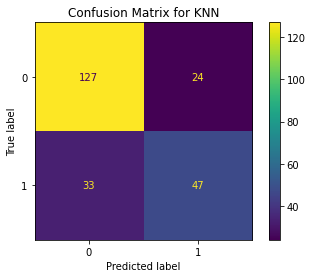

In [69]:
X = diabetes_df[['Glucose','BMI']]
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)

acc_score=knn.score(X_test, y_test).round(2)
y_predicted = knn.predict(X_test)

print("Accuracy Score from KNN method: ",acc_score*100,'%')
print("R squared from KNN: ",r2_score(y_test,y_predicted).round(2))
print("MSE from KNN: ",mean_squared_error(y_test,y_predicted).round(2))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predicted)).plot()
plt.title("Confusion Matrix for KNN");
print(classification_report(y_test, y_predicted))

### confusion matrix and classification report for multiple logistic regression

* Confusion matrix: 
    * Its a matrix format between true predictions and false predictions. Parameters inside confusion matrix are:
        * TP-**True positive**- model predicted positive which is actually positive
        * TN-**True Negative**- model predicted negative which is actually negative
        * FP-**False positive**- model predicted positive which is actually negative
        * FN-**False Negative** model predicted negative whic is actually positive
        
* Precision:
    * **Out of positive predictions, how many we got correct.**
    * It can be calculated as TP/(TP+FP)
    
* Recall:
    * **Out of total positives, how much we correctly identified.**
    * It can be calculated as TP/(TP+FN)
    
* I am checking the performance for diabetes dataset between KNN method and Multiple logistic regression method using confusion matrix, classification report metrics

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       142
           1       0.79      0.52      0.63        89

    accuracy                           0.76       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.76      0.75       231



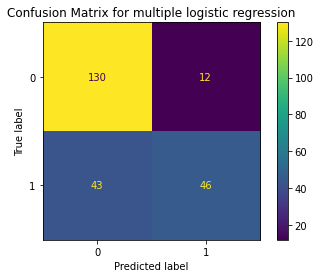

In [72]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix for multiple logistic regression");
print(classification_report(y_test,y_pred))

#### Conclusion: 

* Out of precison,confusion matrix, recall, f1 score I am taking recall metrics to compare performance. Because since it is diabetes, **a person actually have diabetes but False Negative(FN) predicts he is not having diabetes** This causes Type II error. This might leads to that person won't think about diabetes treatment(but he actually need it). 

* Multiple logistic regression predicts FN-43 and KNN predicts FN-33. i.e class 1 recall is slightly more in KNN than multiple logistic regression. So from my point of view KNN model is best fit for diabetes dataset.

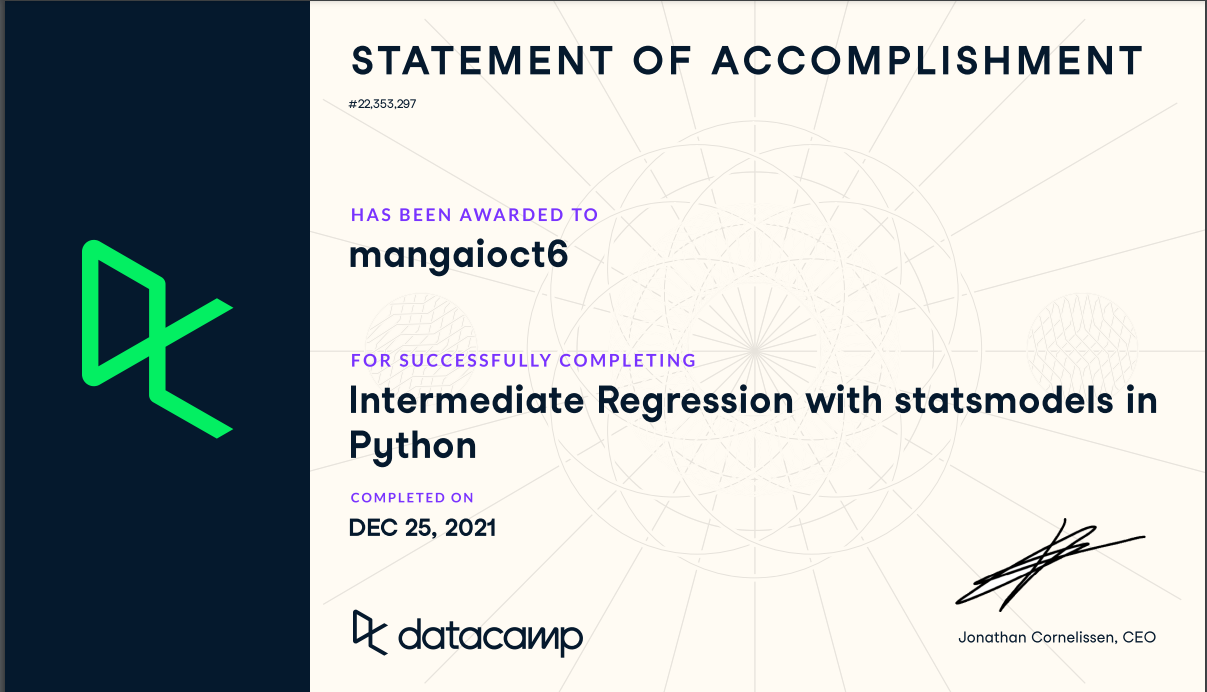